In [1]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

In [47]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

download_root = 'train-data'
mnist_transform=transforms.Compose([
                           transforms.ToTensor()
                           ,transforms.Normalize((0.1307,), (0.3081,))
                           ])
mnist_transform2=transforms.Compose([
                           transforms.ToTensor()])
train_dataset  = datasets.MNIST(download_root, transform=mnist_transform, train=True, download=True)
input_data = train_dataset.data
input_data = input_data.unsqueeze(1)
input_data = torch.div(input_data,255.)
input_data = torch.sub(input_data,0.1307)
input_data = torch.div(input_data,0.3081)
input_labels = train_dataset.targets

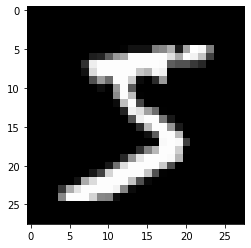

In [48]:
from matplotlib import pyplot

pyplot.imshow(input_data[0][0], cmap="gray")

In [49]:
from torch.utils.data import TensorDataset
from torch import optim

model = Net()
#model_path = './mnist_init_net.pt'
#model.load_state_dict(torch.load(model_path))
log_interval = 10
epochs = 5
batch_size = 64
lr = 0.05
momentum = 0.5

tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.3860, -0.1951, -0.1951, -0.1951,
         1.1795,  1.3068,  1.8032, -0.0933,  1.6887,  2.8215,  2.7197,  1.1923,
        -0.4242, -0.4242, -0.4242, -0.4242])
28
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])
tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.3860, -0.1951, -0.1951, -0.1951,
         1.1795,  1.3068,  1.8032, -0.0933,  1.6887,  2.8215,  2.7197,  1.1923,
        -0.4242, -0.4242, -0.4242, -0.4242])
28
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 

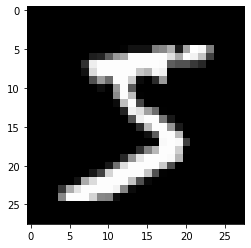

In [50]:
train_loader = DataLoader(dataset=train_dataset,
                         batch_size=batch_size,
                         shuffle=False)
for idx, (data, target) in enumerate(train_loader):    
    print(data[0][0][5])
    print(len(data[0][0]))
    pyplot.imshow(data[0][0], cmap="gray")
    print(target)
    print(input_data[0][0][5])
    print(len(input_data[0][0]))    
    print(input_labels[0:64])
    break

In [53]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

def fit():
    # Make TensorDataset and DataLoader for PyTorch
    train_dataset = TensorDataset(input_data, input_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size)

    # Handling Input of Loss Function
    loss_func = F.nll_loss             
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    nums = []
    accs = []
    for epoch in range(epochs):
        model.train()        
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = loss_func(output, target)                    
            acc = accuracy(output,target)
            loss.backward()
            optimizer.step()            
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {}'.format(
                      epoch+1, batch_idx * len(data), len(train_loader.dataset),
                      100. * batch_idx / len(train_loader), loss.item(), acc*100))  

In [54]:
fit()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316219	Accuracy: 12.5
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.317551	Accuracy: 7.8125
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.249961	Accuracy: 12.5
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.183499	Accuracy: 15.625
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.935102	Accuracy: 28.125
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.708820	Accuracy: 48.4375
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.314126	Accuracy: 56.25
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.127972	Accuracy: 64.0625
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.545753	Accuracy: 48.4375
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.169033	Accuracy: 59.375
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.056814	Accuracy: 62.5
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.843104	Accuracy: 73.4375
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.957850	Accuracy: 64.0625
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.844473	Accuracy: 70.3125
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.663130	Accuracy: 75.0
Train Epoch: 1 [9600/60000

In [ ]:
help(model)